# - ***Marketing Analysis Using `RFM (Recency, Frequency and Monetary)` Framework***
#### `RFM Analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns`

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("New Retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,UnitPrice,Year,Month,Day,Hour,WeekDay
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,1.73,2009,12,1,7,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1.78,2009,12,1,7,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1.78,2009,12,1,7,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,22.86,2009,12,1,7,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,19.20,2009,12,1,7,Tuesday


- I assume that the analysis is done after a week from the campaign.

In [3]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
max_date = df["InvoiceDate"].max() 

# Add 7 days to the maximum date
today_date = max_date + pd.DateOffset(days=7)
print(f"today's date is {max_date}\nthe day the analysis is done date is {today_date}")

today's date is 2010-12-09 20:01:00
the day the analysis is done date is 2010-12-16 20:01:00


In [4]:
rfm = df.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,
                                    "Invoice": lambda num: num.nunique(),
                                    "Price": lambda price: price.sum()                       
                                    })
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346,171,11,206.36
12347,9,2,162.95
12348,80,1,14.39
12349,49,2,373.44
12351,17,1,49.46
...,...,...,...
18283,24,6,477.27
18284,73,1,41.09
18285,302,1,47.65


In [5]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4211.0,97.036333,96.592957,7.00,24.000,58.00,143.00,380.00
Frequency,4211.0,4.303491,7.467080,1.00,1.000,2.00,5.00,184.00
Monetary,4211.0,264.893972,577.427689,0.29,53.285,125.44,291.78,18264.79


- Now I will define the RFM Scores. This score defines how bad or how good this customer is interacting with our store 
    - - Recency represents How far was this customer's last purchase.
    - - Frequency represents How often this customer purchases.
    - - Monetary represents How much this customer spent on our store.

In [6]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequeny_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm

,Recency,Frequency,Monetary,recency_score,frequeny_score,monetary_score
Customer ID,,,,,,
12346,171,11,206.36,2,5,4
12347,9,2,162.95,5,2,3
12348,80,1,14.39,2,1,1
12349,49,2,373.44,3,2,5
12351,17,1,49.46,5,1,2
...,...,...,...,...,...,...
18283,24,6,477.27,4,5,5
18284,73,1,41.09,3,2,1
18285,302,1,47.65,1,2,2


- The Score can be defined by the three factors all combined or two of them. for our case Money may be misleading if someone buys an Expensive product for only one time this will give him high score for  Monetary but he is actually not a good customer as he bought only one time and maybe he bought a long time ago. So I will consider the `Recency and Frequency` factors.

In [7]:
rfm["RFM_SCORE"] = rfm['recency_score'].astype(str) + rfm['frequeny_score'].astype(str)
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequeny_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12969,244,1,22.95,1,1,1,11
15625,18,5,139.51,5,4,3,54
16262,20,1,140.48,5,2,3,52
13074,153,3,108.20,2,3,3,23
17346,15,12,950.12,5,5,5,55
16100,104,1,62.46,2,2,2,22
13418,14,15,691.84,5,5,5,55
16222,363,1,96.70,1,2,3,12
14248,101,2,94.87,2,2,3,22


In [8]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': "Can't Loose",
    r'3[1-2]': "About to Sleep",
    r'33': "Need Attention",
    r'[3-4][4-5]': "Loyal Customer",
    r'41': "Promising",
    r'51': "New Customer",
    r'[4-5][2-3]': "Potential Loyalist",
    r'5[4-5]': "VIP"
}

rfm["Segments"] = rfm["RFM_SCORE"].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequeny_score,monetary_score,RFM_SCORE,Segments
Customer ID,,,,,,,,
12346,171,11,206.36,2,5,4,25,Can't Loose
12347,9,2,162.95,5,2,3,52,Potential Loyalist
12348,80,1,14.39,2,1,1,21,Hibernating
12349,49,2,373.44,3,2,5,32,About to Sleep
12351,17,1,49.46,5,1,2,51,New Customer


- ***What is the percentage of each Segment in our dataset?***

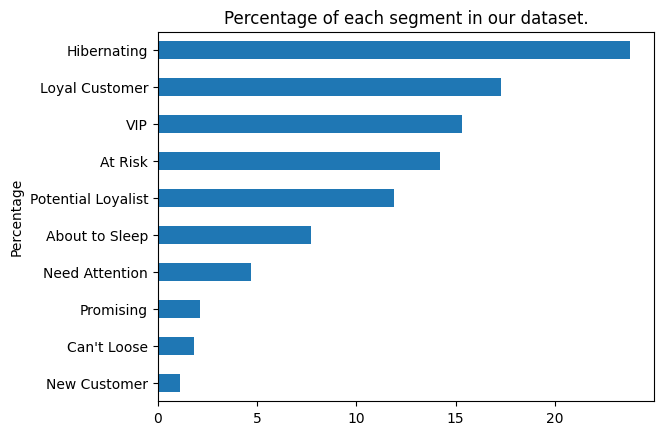

In [9]:
(rfm["Segments"].value_counts(normalize=True).round(3) * 100).plot(kind='barh')
plt.xlabel("")
plt.ylabel("Percentage")
plt.title("Percentage of each segment in our dataset.")

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest on the top

plt.savefig("figs/What is the Percentage of each segment in our dataset.png", format="png")
plt.show()

In [10]:
rfm.groupby("Segments")[["Recency", "Frequency", "Monetary"]].describe().T

Segments         About to Sleep     At Risk  Can't Loose  Hibernating  \
Recency   count      326.000000  600.000000    77.000000  1001.000000   
          mean        59.061350  157.391667   131.610390   217.941059   
          std          9.886864   69.724750    53.217319    90.209642   
          min         43.000000   77.000000    77.000000    77.000000   
          25%         51.000000   98.000000    91.000000   141.000000   
          50%         58.000000  140.000000   116.000000   217.000000   
          75%         67.000000  203.000000   144.000000   288.000000   
          max         76.000000  378.000000   304.000000   380.000000   
Frequency count      326.000000  600.000000    77.000000  1001.000000   
          mean         1.199387    3.030000     8.896104     1.116883   
          std          0.400153    1.041269     5.841288     0.321442   
          min          1.000000    2.000000     6.000000     1.000000   
          25%          1.000000    2.000000     6.000000     1.000000   
          50%          1.000000    3.000000     7.000000     1.000000   
          75%          1.000000    4.000000     9.000000     1.000000   
          max          2.000000    6.000000    46.000000     2.000000   
Monetary  count      326.000000  600.000000    77.000000  1001.000000   
          mean        70.498190  172.857102   478.901039    64.761502   
          std         69.054694  150.131984   658.234871    62.578349   
          min          1.250000    1.180000    20.670000     0.290000   
          25%         27.405000   67.235000   189.820000    23.740000   
          50%         53.485000  133.895000   300.920000    48.920000   
          75%         88.585000  227.765000   591.400000    87.750000   
          max        614.930000  952.400000  5234.950000   672.350000   

Segments         Loyal Customer  Need Attention  New Customer  \
Recency   count      727.000000      197.000000     48.000000   
          mean        42.089409       58.690355     14.583333   
          std         15.891210        9.676426      4.191345   
          min         22.000000       43.000000      7.000000   
          25%         29.000000       50.000000     11.000000   
          50%         37.000000       59.000000     14.500000   
          75%         56.000000       66.000000     17.000000   
          max         76.000000       76.000000     21.000000   
Frequency count      727.000000      197.000000     48.000000   
          mean         6.639615        2.416244      1.000000   
          std          4.096558        0.494191      0.000000   
          min          3.000000        2.000000      1.000000   
          25%          4.000000        2.000000      1.000000   
          50%          5.000000        2.000000      1.000000   
          75%          8.000000        3.000000      1.000000   
          max         41.000000        3.000000      1.000000   
Monetary  count      727.000000      197.000000     48.000000   
          mean       433.087546      169.037665     74.532917   
          std        404.180817      162.874769     65.308521   
          min         18.040000        2.800000      2.950000   
          25%        180.070000       73.380000     25.050000   
          50%        314.800000      136.000000     56.390000   
          75%        553.230000      220.390000     96.550000   
          max       4461.120000     1770.510000    319.290000   

Segments         Potential Loyalist   Promising           VIP  
Recency   count          501.000000   88.000000    646.000000  
          mean            24.900200   31.704545     13.176471  
          std              9.687622    5.963797      4.629846  
          min              7.000000   22.000000      7.000000  
          25%             17.000000   27.750000      9.000000  
          50%             25.000000   31.000000     13.000000  
          75%             34.000000   36.000000     17.000000  
          max             42.000000 

In [11]:
rfm.to_csv("rfm marketing framework.csv", index=False)